# Bianco Research Group - Summer 2019

In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Potentially useful astropy stuff
import astropy.io.ascii as ascii
from astropy.table import Table
from astropy.io import fits
from astropy.stats import LombScargle
from astropy.stats import sigma_clipped_stats
from astropy.modeling import powerlaws
from astropy import constants as const
from astropy import units as u

#For reading in and organizing data
import pandas as pd
import requests
import json

#Misc
from scipy import stats
from scipy.optimize import curve_fit
from collections import Counter
import itertools
import seaborn as sns

#Making Figures look nice
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 22

In [270]:
#From NASA's Exoplanet Archive API:
url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=k2targets&select=epic_number,k2_dist,k2_teff,k2_rad,k2_mass,k2_bjmag,k2_vjmag,k2_gmag,k2_imag&format=CSV"

In [271]:
df = pd.read_csv(url) #Reads above CSV table into a pandas dataframe

In [272]:
df #Have a look at the dataframe

,epic_number,k2_dist,k2_teff,k2_rad,k2_mass,k2_bjmag,k2_vjmag,k2_gmag,k2_imag
0,60018365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60018369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60018371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60018372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60018374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,60018376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,60018377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,60018378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,60018380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,60018381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that this is not the full K2 dataset, I only selected the columns I thought would be useful

In [273]:
df.columns #So we can see all the column labels

Index(['epic_number', 'k2_dist', 'k2_teff', 'k2_rad', 'k2_mass', 'k2_bjmag',
       'k2_vjmag', 'k2_gmag', 'k2_imag'],
      dtype='object')

Let's make a quick and dirty H-R diagram:

In [274]:
df['k2_L'] = 4 * np.pi * (df['k2_rad'] * const.R_sun)**2 * const.sigma_sb * df['k2_teff']**4 
#Adding a column for luminosity in (Watts)

In [275]:
df['k2_teff'].max(),df['k2_teff'].min()
#To get an idea of the window size

(33037.0, 1708.0)

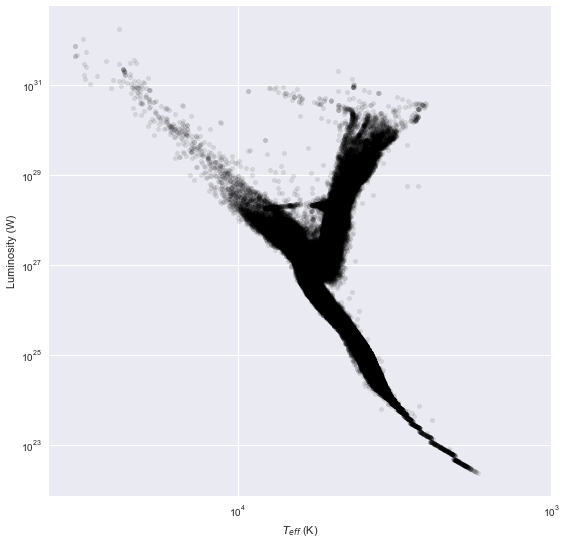

In [276]:
#Plot the HR diagram:
df.plot.scatter(x='k2_teff',y='k2_L', loglog=True, color='k', s=20, alpha=0.1, figsize=(9,9))
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)')

Covey et al. (2007) has a table of spectral types as a function of synth. g-i color. Maybe can use this?

In [277]:
df['k2_g-i'] = df['k2_gmag'] - df['k2_imag']

In [278]:
def gi_to_ST(k2_gi):
    
    '''
    This function takes an array of g-i magnitudes and assigns them a spectral type 
    using a dictionary constructed from Table 2 from Covey et. al. 2007. (Table has
    characteristic uncertainties of 0.05 magnitudes)
    
    returns: list of strings
    '''
    
    gi_dict = {'O5 or earlier': -1.00,
    'O9': -0.97,
    'B0' : -0.94,
    'B1' : -0.82,
    'B3' : -0.72,
    'B8' : -0.57,
    'B9' : -0.51,
    'A0' : -0.44,
    'A2' : -0.39,
    'A3' : -0.30,
    'A5' : -0.21,
    'A7' : -0.10,
    'F0' : 0.09,
    'F2' : 0.22,
    'F5' : 0.29,
    'F6' : 0.36,
    'F8' : 0.45,
    'G0' : 0.52,
    'G2' : 0.60,
    'G5' : 0.65,
    'G8' : 0.76,
    'K0' : 0.83,
    'K2' : 1.02,
    'K3' : 1.17,
    'K4' : 1.38,
    'K5' : 1.59,
    'K7' : 1.88,
    'M0' : 1.95,
    'M1' : 2.10,
    'M2' : 2.28,
    'M3' : 2.66,
    'M4' : 2.99,
    'M5' : 3.32,
    'M6 or later' : 3.84}

    st_list = ['']*len(k2_gi) #List of empty strings that we will be filled with spectral types
    
    
    #Go thru each g-i and assign it a spectral type key from the above dictionary
    #for i in range(10000):
    for i in range(len(k2_gi)):
        if i % 40000 == 0:
            print('Progress = '+str(i/4000)+'%')#To keep track of loop progress
            
        if np.isnan(k2_gi[i]) == True: #Disregard NaNs before checking dict
            st_list[i] = 'No g-i'
        
        else:#Check dict for value closest to the g-i color of each target, then assign key as its spectral type
            
            diffs = np.zeros(len(gi_dict))
        
            j=0
            
            sp_ty = ['']*len(gi_dict)
            
            for spec_type, gi in gi_dict.items():
            
                diffs[j] = abs(k2_gi[i]-gi)
                
                sp_ty[j] = spec_type
                
                j += 1
            
            #print(diffs, len(diffs))
            min_diff = np.argmin(diffs)
            #print(min_diff,sp_ty[min_diff])
            st_list[i] = sp_ty[min_diff]
            
    return st_list

In [279]:
df['Spec_Type'] = gi_to_ST(df['k2_g-i'])

Progress = 0.0%
Progress = 10.0%
Progress = 20.0%
Progress = 30.0%
Progress = 40.0%
Progress = 50.0%
Progress = 60.0%
Progress = 70.0%
Progress = 80.0%
Progress = 90.0%


In [280]:
df

,epic_number,k2_dist,k2_teff,k2_rad,k2_mass,k2_bjmag,k2_vjmag,k2_gmag,k2_imag,k2_L,k2_g-i,Spec_Type
0,60018365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
1,60018369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
2,60018371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
3,60018372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
4,60018374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
5,60018376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
6,60018377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
7,60018378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
8,60018380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
9,60018381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i


In [281]:
df['k2_g-i'].min()

-2.4140000000000015

In [282]:
df['k2_g-i'].max()

11.806000000000001

Hmmm.... Definitely stars earlier than 05 and later than M6 in the data.

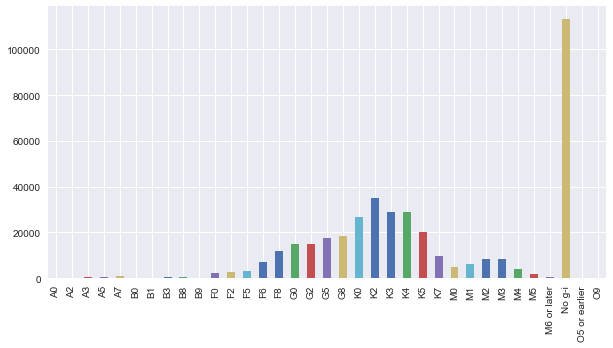

In [283]:
#Make a bar plot to see (roughly) how many of each spectral type there are:
from collections import Counter
pd.Series(Counter(df['Spec_Type'])).plot(kind='bar',figsize=(10,5))

In [284]:
#Just to see the exact values:
Counter(df['Spec_Type'])

Counter({'A0': 162,
         'A2': 195,
         'A3': 293,
         'A5': 385,
         'A7': 1064,
         'B0': 56,
         'B1': 153,
         'B3': 241,
         'B8': 291,
         'B9': 204,
         'F0': 2329,
         'F2': 2655,
         'F5': 3294,
         'F6': 6969,
         'F8': 11618,
         'G0': 14789,
         'G2': 14979,
         'G5': 17576,
         'G8': 18353,
         'K0': 26779,
         'K2': 35201,
         'K3': 28935,
         'K4': 28950,
         'K5': 19983,
         'K7': 9661,
         'M0': 4925,
         'M1': 6081,
         'M2': 8551,
         'M3': 8285,
         'M4': 3900,
         'M5': 1556,
         'M6 or later': 500,
         'No g-i': 113249,
         'O5 or earlier': 76,
         'O9': 7})

In [285]:
cmap = plt.get_cmap('RdYlBu')
names = ['O5 or earlier',
    'O9',
    'B0',
    'B1',
    'B3',
    'B8',
    'B9',
    'A0',
    'A2',
    'A3',
    'A5',
    'A7',
    'F0',
    'F2',
    'F5',
    'F6',
    'F8',
    'G0',
    'G2',
    'G5',
    'G8',
    'K0',
    'K2',
    'K3',
    'K4',
    'K5',
    'K7',
    'M0',
    'M1',
    'M2',
    'M3',
    'M4',
    'M5',
    'M6 or later']
colors = cmap(np.linspace(1, 0, len(names)))
print(colors)

[[0.19215686 0.21176471 0.58431373 1.        ]
 [0.21368704 0.27958478 0.61768551 1.        ]
 [0.23829296 0.35709343 0.65582468 1.        ]
 [0.26289889 0.43460208 0.69396386 1.        ]
 [0.31034218 0.50618993 0.73041138 1.        ]
 [0.3609381  0.56647443 0.76163014 1.        ]
 [0.41876201 0.63537101 0.79730873 1.        ]
 [0.48027682 0.69873126 0.83068051 1.        ]
 [0.5479431  0.75286428 0.86020761 1.        ]
 [0.6071511  0.80023068 0.88604383 1.        ]
 [0.67466359 0.85297962 0.91487889 1.        ]
 [0.73986928 0.88496732 0.93333333 1.        ]
 [0.80507497 0.91695502 0.95178777 1.        ]
 [0.86212995 0.94494425 0.96793541 1.        ]
 [0.90703576 0.96401384 0.91995386 1.        ]
 [0.94517493 0.97877739 0.84982699 1.        ]
 [0.98331411 0.99354095 0.77970012 1.        ]
 [0.99946175 0.98331411 0.72372165 1.        ]
 [0.99823145 0.94517493 0.66589773 1.        ]
 [0.99700115 0.90703576 0.60807382 1.        ]
 [0.99577086 0.86305267 0.5502499  1.        ]
 [0.99469435 

In [286]:
teff_na = df['k2_teff'].dropna()
L_na = df['k2_L'].dropna()

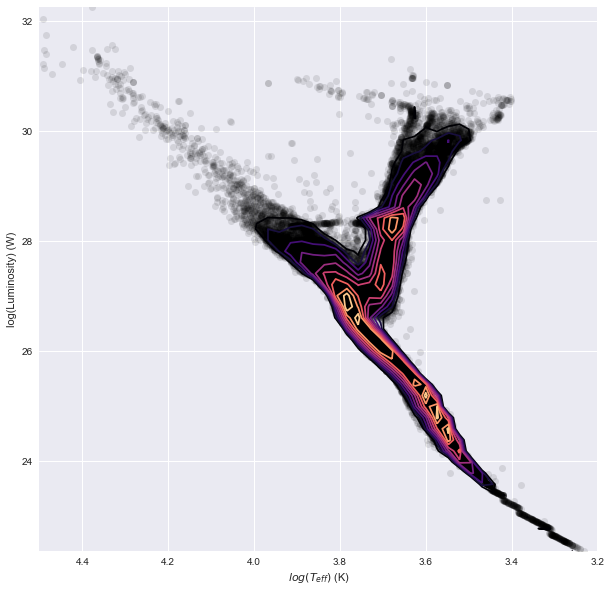

In [287]:
from astroML import plotting

ax = plt.figure(figsize=(10,10)).add_subplot()
plotting.scatter_contour(np.log10(teff_na), np.log10(L_na), threshold=50, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=50),
                filled_contour=False,
                plot_args=dict(marker='o', linestyle='none', color='black', alpha=0.1),
                contour_args=dict(cmap=plt.cm.magma))
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)')
plt.xlim(4.5,3.2)
plt.savefig("k2scatter_contour.png")

## Flare rates from Paudel et al 2018

### Reading in and viewing data

In [47]:
url = "https://iopscience.iop.org/0004-637X/858/1/55/suppdata/apjaab8fet3_mrt.txt"

In [48]:
table3 = pd.read_csv(url, sep=" ", skiprows=list(range(18)))
table3.columns = ["EPIC", "Ptime", "Duration", "logE"]

In [49]:
table3

,EPIC,Ptime,Duration,logE
0,206050032,2145.5278,0.63,29.3
1,206050032,2146.7530,240.00,31.9
2,206050032,2147.2441,31.00,31.0
3,206050032,2147.7570,1.50,29.7
4,206050032,2148.0304,54.00,31.2
5,206050032,2149.7279,23.00,30.8
6,206050032,2150.5321,17.00,30.7
7,206050032,2151.8034,15.00,30.6
8,206050032,2152.4019,6.00,30.2
9,206050032,2153.0392,100.00,31.5


In [51]:
spec_list = ["M6.5", "M8", "M7.5", "M7.5", "M7", "M8", "M6.5", "M8.5", "L0", "L0"]

### Visualizing distribution of flare energy in each target

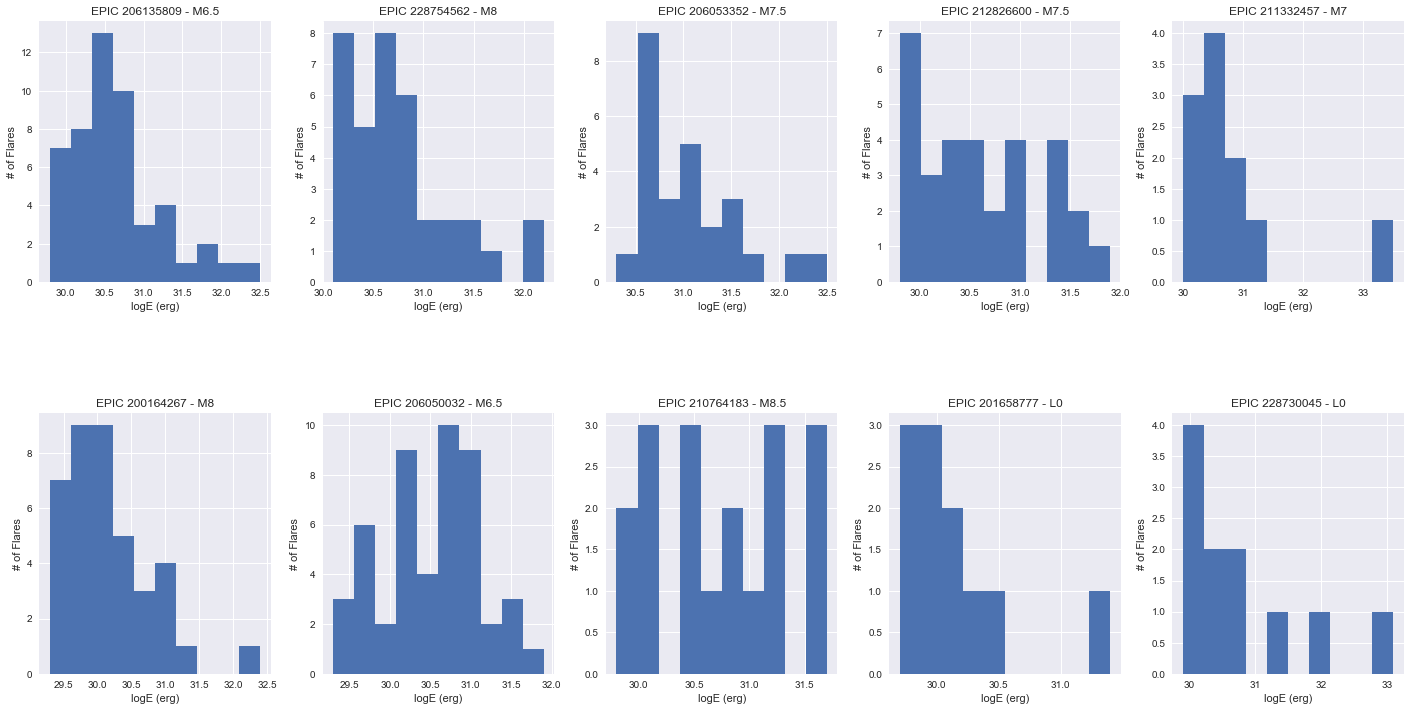

In [52]:
#Loops through above dataframe and makes histogram of log flare energy (erg) for each target

fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i, epic in enumerate(set(data['EPIC']),start=0):
    star = np.where(table3['EPIC'] == epic)[0]
    axs[i].hist(table3['logE'][star],bins=10)

#for ax in axs:
#    ax.label_outer()
j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel('# of Flares')
    epic = list(set(table3['EPIC']))
    ax.set_title('EPIC '+str(epic[j])+' - '+str(spec_list[j]))
    j += 1
plt.savefig('Figures/flar_hists.png')

### K-S and A-D tests:

In [126]:
#K-S tests:

for i in range(10):
#    print("K-S tests for EPIC {} vs:".format(list(set(data['EPIC']))[i]))
    for e in range(10):
        star1 = np.where(data['EPIC'] == list(set(data['EPIC']))[i])[0]
        star2 = np.where(data['EPIC'] == list(set(data['EPIC']))[e])[0]
    
#        print("EPIC {}".format(list(set(data['EPIC']))[e])+":  "+str(stats.ks_2samp(data['logE'][star1],data['logE'][star2])[1]))
#    print(" ")

In [7]:
ks_arr = np.zeros((10,10))

for i in range(10):
    for e in range(10):
        star1 = np.where(data['EPIC'] == list(set(data['EPIC']))[i])[0]
        star2 = np.where(data['EPIC'] == list(set(data['EPIC']))[e])[0]
        ks_pval = stats.ks_2samp(data['logE'][star1],data['logE'][star2])[1]
        ks_arr[i][e] = ks_pval

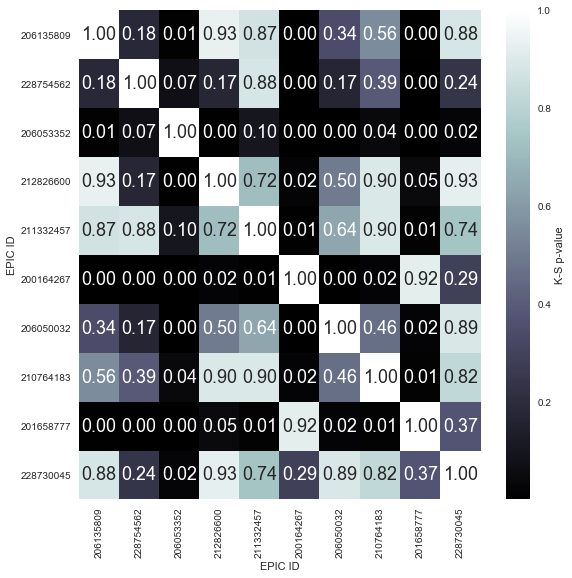

In [71]:
#Heatmap to visualize K-S test results

ax = plt.figure(figsize=(9,9))

ax = sns.heatmap(ks_arr, cmap='bone', cbar_kws=dict(label="K-S p-value"), annot=True, fmt='0.2f', 
            xticklabels=list(set(data['EPIC'])), yticklabels=list(set(data['EPIC'])))

ax.set_xlabel("EPIC ID")
ax.set_ylabel("EPIC ID")

plt.savefig('Figures/ks_map.png')

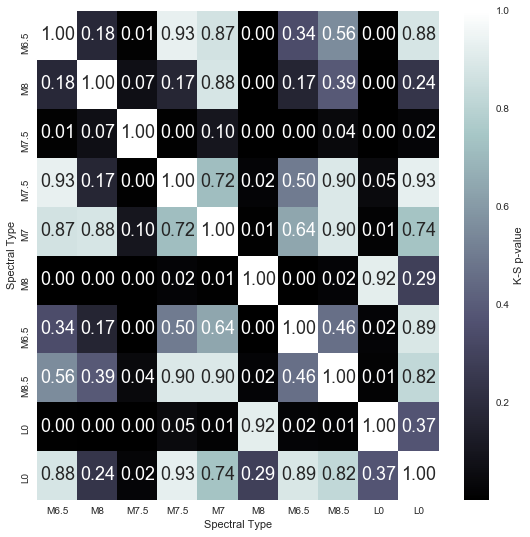

In [73]:
#Same heatmap with spectral types instead of EPIC numbers

ax = plt.figure(figsize=(9,9))

ax = sns.heatmap(ks_arr, cmap='bone', cbar_kws=dict(label="K-S p-value"), annot=True, fmt='0.2f', 
            xticklabels=spec_list, yticklabels=spec_list)

ax.set_xlabel("Spectral Type")
ax.set_ylabel("Spectral Type")

plt.savefig('Figures/ks_map_spec.png')

In [11]:
ad_stat = np.zeros(10)
ad_critvals = np.zeros((10,5))
for i in range(10):
    star = np.where(data['EPIC'] == list(set(data['EPIC']))[i])[0]
    
    ad_stat[i] = stats.anderson(data['logE'][star], dist='norm')[0]
    ad_critvals[i][:] = stats.anderson(data['logE'][star], dist='norm')[1]

    print('A-D test 1: ' + str(list(set(data['EPIC']))[i]) + '  A-D stat = {}'.format(ad_stat[i])+ 
          ',  A-D critical values (15%,10%,5%,2.5%,1%) = {}'.format(ad_critvals[i]))  

A-D test 1: 206135809  A-D stat = 1.129944394236702,  A-D critical values (15%,10%,5%,2.5%,1%) = [0.538 0.613 0.736 0.858 1.021]
A-D test 1: 228754562  A-D stat = 1.168934703064025,  A-D critical values (15%,10%,5%,2.5%,1%) = [0.528 0.601 0.721 0.841 1.   ]
A-D test 1: 206053352  A-D stat = 1.1032098263171193,  A-D critical values (15%,10%,5%,2.5%,1%) = [0.516 0.587 0.705 0.822 0.978]
A-D test 1: 212826600  A-D stat = 0.6082806896137605,  A-D critical values (15%,10%,5%,2.5%,1%) = [0.522 0.595 0.713 0.832 0.99 ]
A-D test 1: 211332457  A-D stat = 1.3117608589682934,  A-D critical values (15%,10%,5%,2.5%,1%) = [0.498 0.567 0.68  0.793 0.944]
A-D test 1: 200164267  A-D stat = 0.8322975639797008,  A-D critical values (15%,10%,5%,2.5%,1%) = [0.53  0.604 0.725 0.845 1.005]
A-D test 1: 206050032  A-D stat = 0.3330183073779409,  A-D critical values (15%,10%,5%,2.5%,1%) = [0.538 0.612 0.735 0.857 1.019]
A-D test 1: 210764183  A-D stat = 0.3481913773566916,  A-D critical values (15%,10%,5%,2.5%,

In [12]:
ad_arr = np.zeros((10,10))

for i in range(10):
    for e in range(10):
        star1 = np.where(data['EPIC'] == list(set(data['EPIC']))[i])[0]
        star2 = np.where(data['EPIC'] == list(set(data['EPIC']))[e])[0]
        arr1 = np.array(data['logE'][star1])
        arr2 = np.array(data['logE'][star2])
        
        ad_stat = stats.anderson_ksamp(np.array([arr1,arr2]))[0]
        ad_critvals = stats.anderson_ksamp(np.array([arr1,arr2]))[1]
        
        if ad_stat < ad_critvals[2]: #Test vs. 5% confidence level
            ad_arr[i][e] = 1 #reject H0
        else:
            ad_arr[i][e] = 0 #not enough evidence to reject H0

/Users/Riley/anaconda/lib/python3.6/site-packages/scipy/stats/morestats.py:1694: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


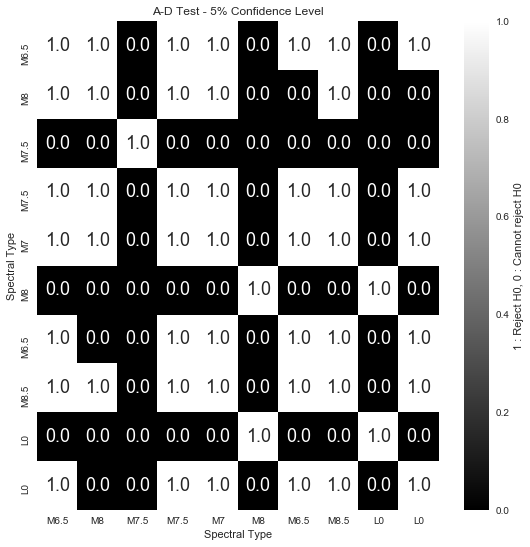

In [13]:
ax = plt.figure(figsize=(9,9))

ax = sns.heatmap(ad_arr, cmap='gray', cbar_kws=dict(label="1 : Reject H0, 0 : Cannot reject H0"), annot=True, fmt='0.1f', 
            xticklabels=spec_list, yticklabels=spec_list)

ax.set_xlabel("Spectral Type")
ax.set_ylabel("Spectral Type")
ax.set_title("A-D Test - 5% Confidence Level")

plt.savefig('Figures/ad_map_spec.png')

## Replicating FFDs from Rishi's paper

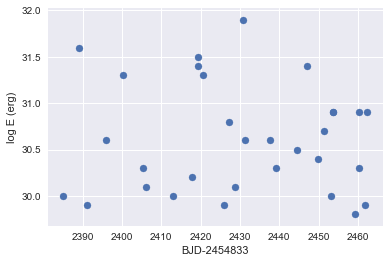

In [142]:
tar1 = np.where(data['EPIC'] == 212826600)[0]
tar1_t = data['Ptime'][tar1]
tar1_E = data['logE'][tar1]

plt.scatter(tar1_t,tar1_E)
plt.xlabel('BJD-2454833')
plt.ylabel('log E (erg)')

In [143]:
c=Counter(tar1_E)
c = dict(c)
c

{29.8: 1,
 29.9: 3,
 30.0: 3,
 30.1: 2,
 30.2: 1,
 30.3: 3,
 30.4: 1,
 30.5: 1,
 30.6: 3,
 30.7: 1,
 30.8: 1,
 30.9: 4,
 31.3: 2,
 31.4: 2,
 31.5: 1,
 31.6: 1,
 31.9: 1}

In [144]:
energies = list(c.keys())
freqs = list(c.values())
cumul_freq = np.zeros((2,len(freqs)))

for e in range(len(energies)):
    cumul_freq[0][e] = energies[e]
    count = 0
    for f in range(len(energies)):
        
        if (energies[e] == energies[f]) or (energies[e] < energies[f]):
            count += freqs[f]
            
        else:
            pass
        
        cumul_freq[1][e] = count
        
print(cumul_freq)

[[30.  31.6 29.9 30.6 31.3 30.3 30.1 30.2 31.4 31.5 30.8 31.9 30.5 30.4
  30.7 30.9 29.8]
 [27.   2.  30.  16.   7.  21.  24.  22.   5.   3.  12.   1.  17.  18.
  13.  11.  31. ]]


In [145]:
tar1_days = tar1_t.max() - tar1_t.min()

tar1_hours = tar1_days * 24

np.log10(1 / tar1_hours)

flr_engs = cumul_freq[0][:]
logflrfreq = np.log10(cumul_freq[1][:] / tar1_hours)

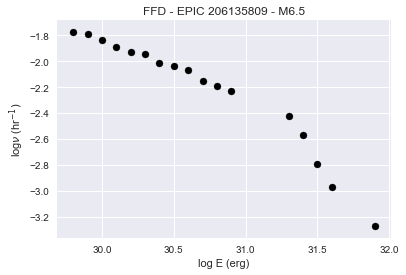

In [146]:
plt.scatter(flr_engs,logflrfreq, c='k')
plt.ylabel(r'log$\nu$ (hr$^{-1})$')
plt.xlabel('log E (erg)')
plt.title("FFD - EPIC 206135809 - M6.5")
plt.savefig('Figures/ffd1.png')

Amp = -2.373066830550664, E_break = 31.206562610468875, slope_1 = -6.444210221143499, slope_2 = -15.271900841282012


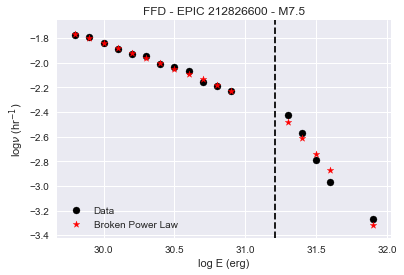

In [149]:
def bpl(x, A, x_break, alpha_1, alpha_2):
    return powerlaws.BrokenPowerLaw1D.evaluate(x, A, x_break, alpha_1, alpha_2)

#plt.scatter(flr_engs, bpl(flr_engs,-2,30.5,-2,-5), marker='*')

popt, pcov = curve_fit(bpl, flr_engs, logflrfreq, p0 = (-1.75,30,-2,-5))

plt.scatter(flr_engs,logflrfreq, c='k', marker='o', label='Data')
plt.scatter(flr_engs, bpl(flr_engs,*popt), marker='*', c='red', label='Broken Power Law')
plt.axvline(x=popt[1], c='k', ls='--')
print('Amp = '+str(popt[0]) + ', E_break = ' + str(popt[1]) + ', slope_1 = ' + str(popt[2]) + 
      ', slope_2 = ' + str(popt[3]))
plt.ylabel(r'log$\nu$ (hr$^{-1})$')
plt.xlabel('log E (erg)')
plt.title("FFD - EPIC 212826600 - M7.5")
plt.legend()
plt.savefig('Figures/ffd1_bplfit.png')

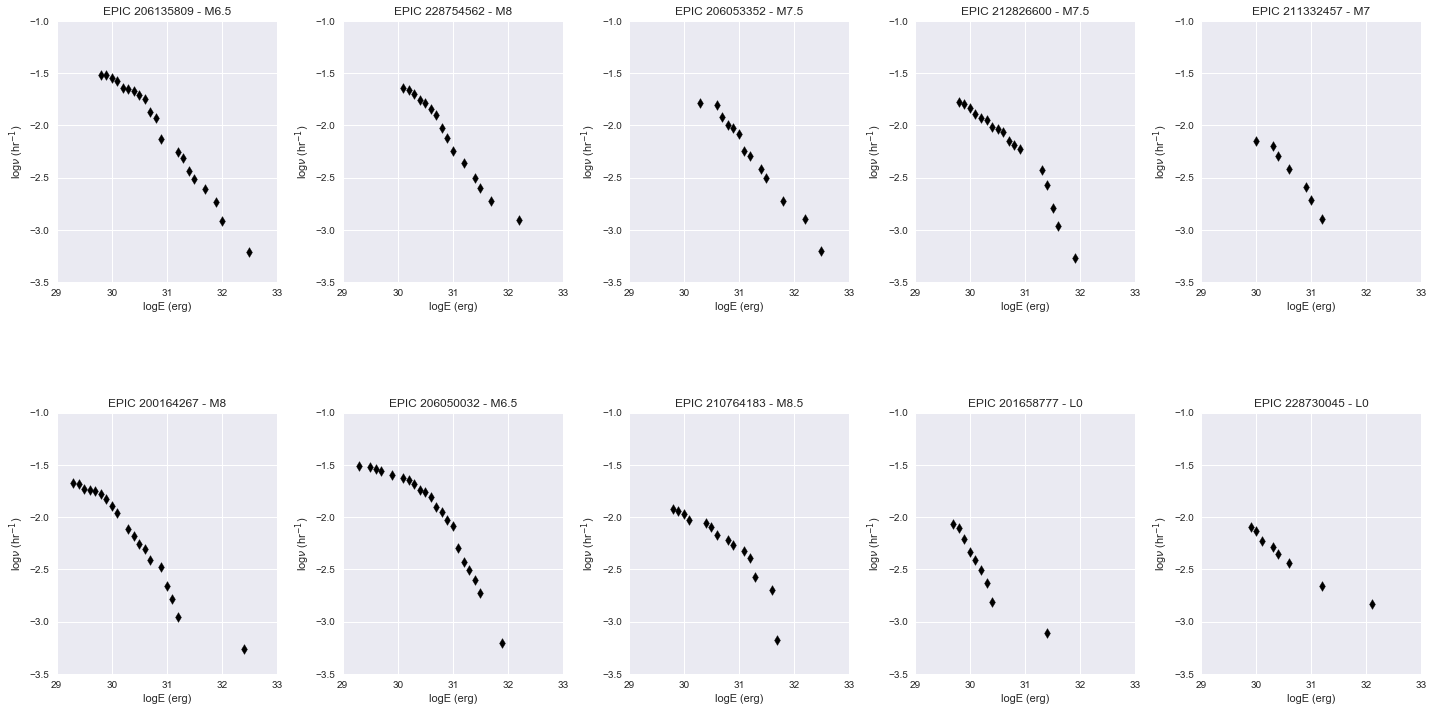

In [150]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
for i, epic in enumerate(set(data['EPIC']),start=0):
    
    tar = np.where(data['EPIC'] == epic)[0]
    tar_t = data['Ptime'][tar]
    tar_E = data['logE'][tar]
    
    c=Counter(tar_E)
    c = dict(c)
    
    energies = list(c.keys())
    freqs = list(c.values())
    cumul_freq = np.zeros((2,len(freqs)))

    for e in range(len(energies)):
        cumul_freq[0][e] = energies[e]
        count = 0
        for f in range(len(energies)):
        
            if (energies[e] == energies[f]) or (energies[e] < energies[f]):
                count += freqs[f]
            
            else:
                pass
        
            cumul_freq[1][e] = count
    
    tar_days = tar_t.max() - tar_t.min()

    tar_hours = tar_days * 24

    np.log10(1 / tar_hours)

    flr_engs = cumul_freq[0][:]
    
    logflrfreq = np.log10(cumul_freq[1][:] / tar_hours)
    
    axs[i].scatter(flr_engs,logflrfreq, c='k', marker = 'd')
    
#for ax in axs:
#    ax.label_outer()

j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel(r'log$\nu$ (hr$^{-1}$)')
    epic = list(set(data['EPIC']))
    ax.set_ylim(-3.5,-1)
    ax.set_xlim(29,33)
    ax.set_title('EPIC '+str(epic[j])+' - '+str(spec_list[j]))
    j += 1
    
plt.savefig('Figures/ffds.png')

206135809: m = -0.6636439246580608
228754562: m = -0.6834981872642012
206053352: m = -0.6775452481334137
212826600: m = -0.6524138572271466
211332457: m = -0.30458511965744317
200164267: m = -0.5972982268844502
206050032: m = -0.6102439621618403
210764183: m = -0.51107844299718
201658777: m = -0.6417806198932671
228730045: m = -0.3153638739412471


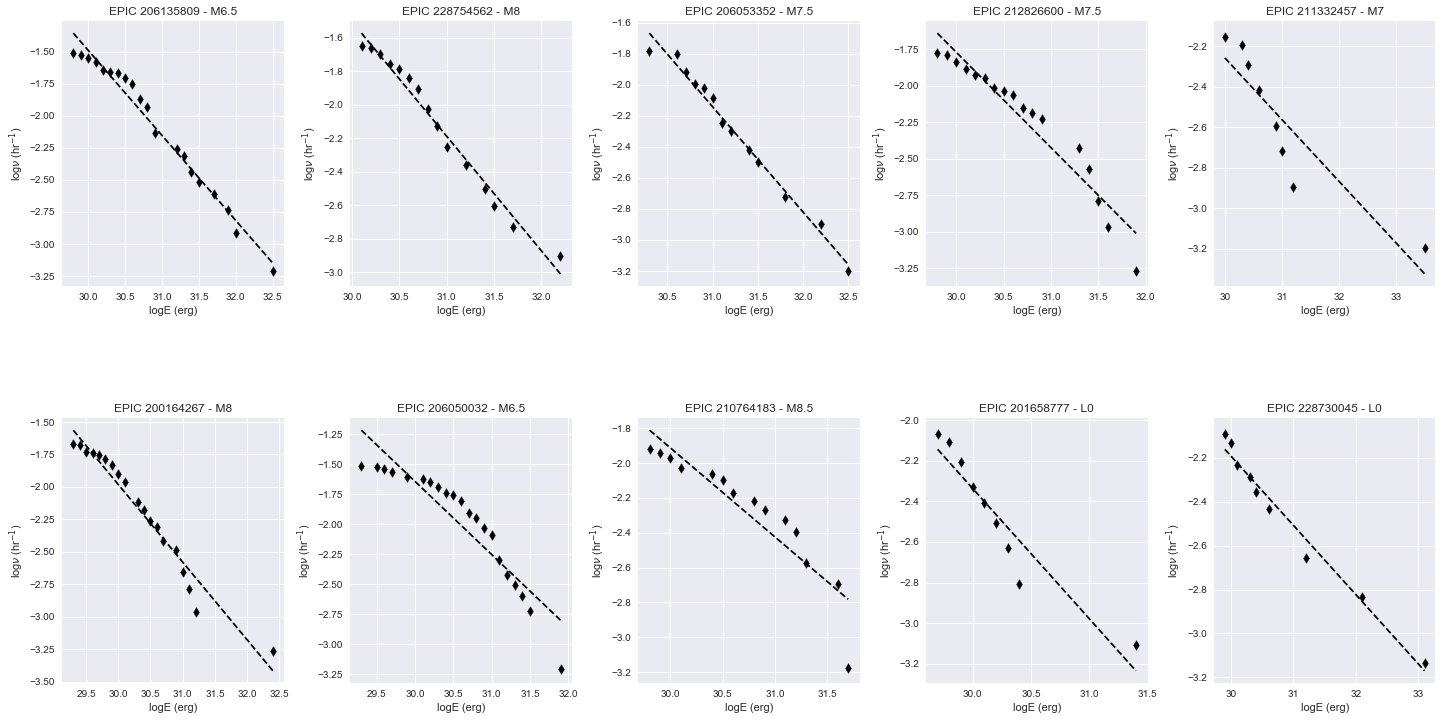

In [18]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
for i, epic in enumerate(set(data['EPIC']),start=0):
    
    tar = np.where(data['EPIC'] == epic)[0]
    tar_t = data['Ptime'][tar]
    tar_E = data['logE'][tar]
    
    c=Counter(tar_E)
    c = dict(c)
    
    energies = list(c.keys())
    freqs = list(c.values())
    cumul_freq = np.zeros((2,len(freqs)))

    for e in range(len(energies)):
        cumul_freq[0][e] = energies[e]
        count = 0
        for f in range(len(energies)):
        
            if (energies[e] == energies[f]) or (energies[e] < energies[f]):
                count += freqs[f]
            
            else:
                pass
        
            cumul_freq[1][e] = count
    
    tar_days = tar_t.max() - tar_t.min()

    tar_hours = tar_days * 24

    np.log10(1 / tar_hours)

    flr_engs = cumul_freq[0][:]
    
    logflrfreq = np.log10(cumul_freq[1][:] / tar_hours)
    
    axs[i].scatter(flr_engs,logflrfreq, c='k', marker = 'd')
    
    m, b, _, _, _ = stats.linregress(flr_engs, logflrfreq)
    print(str(list(set(data['EPIC']))[i])+': m = ' + str(m))
    dom = np.linspace(flr_engs.min(), flr_engs.max())
    
    axs[i].plot(dom,m*dom + b,c='k',ls='--')
    
    
#for ax in axs:
#    ax.label_outer()

j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel(r'log$\nu$ (hr$^{-1}$)')
    epic = list(set(data['EPIC']))
    ax.set_title('EPIC '+str(epic[j])+' - '+str(spec_list[j]))
    j += 1
    
plt.savefig('Figures/ffd_linfits.png')

206135809: m = -0.6641366410450279
228754562: m = -0.6980839450105948
206053352: m = -0.6785414058617268
212826600: m = -0.6749947485863086
211332457: m = -0.6389233440613389
200164267: m = -0.650413214516844
206050032: m = -0.6046830914754634
210764183: m = -0.5237347230450351
201658777: m = -0.6175195606067394
228730045: m = -0.33917612996825874


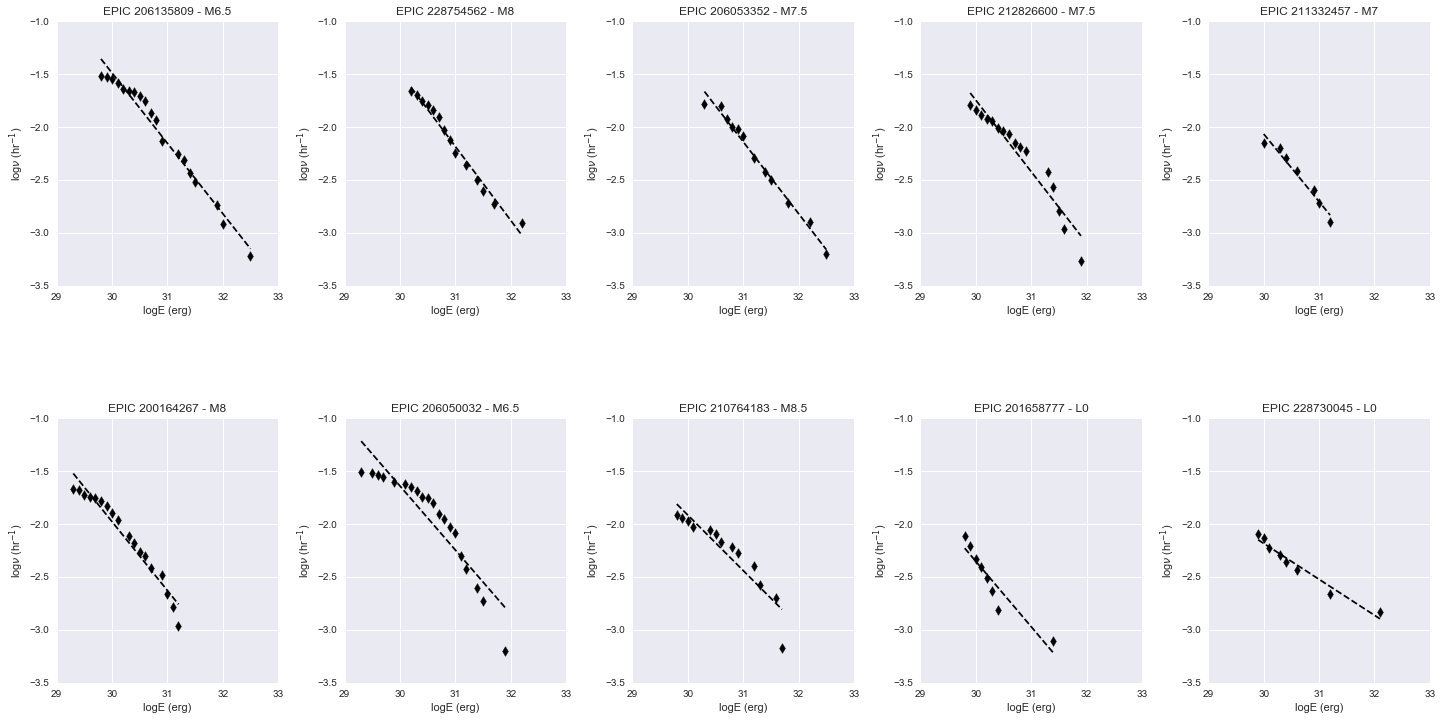

In [14]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
for i, epic in enumerate(set(data['EPIC']),start=0):
    
    tar = np.where(data['EPIC'] == epic)[0]
    tar_t = data['Ptime'][tar]
    tar_E = data['logE'][tar]
    
    c=Counter(tar_E)
    c = dict(c)
    
    energies = list(c.keys())
    freqs = list(c.values())
    cumul_freq = np.zeros((2,len(freqs)))

    for e in range(len(energies)):
        cumul_freq[0][e] = energies[e]
        count = 0
        for f in range(len(energies)):
        
            if (energies[e] == energies[f]) or (energies[e] < energies[f]):
                count += freqs[f]
            
            else:
                pass
        
            cumul_freq[1][e] = count
    
    tar_days = tar_t.max() - tar_t.min()

    tar_hours = tar_days * 24

    np.log10(1 / tar_hours)

    flr_engs = cumul_freq[0][:]
    
    logflrfreq = np.log10(cumul_freq[1][:] / tar_hours)
    
    axs[i].scatter(flr_engs[:-1],logflrfreq[:-1], c='k', marker = 'd')
    
    
    dom = np.linspace(flr_engs[:-1].min(), flr_engs[:-1].max())
    
    axs[i].plot(dom,m*dom + b,c='k',ls='--')
    
    
#for ax in axs:
#    ax.label_outer()

j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel(r'log$\nu$ (hr$^{-1}$)')
    ax.set_ylim(-3.5,-1)
    ax.set_xlim(29,33)
    epic = list(set(data['EPIC']))
    ax.set_title('EPIC '+str(epic[j])+' - '+str(spec_list[j]))
    j += 1
    
plt.savefig('Figures/ffd_linfit2.png')

### Table 1 Data

In [6]:
url = 'https://iopscience.iop.org/0004-637X/858/1/55/suppdata/apjaab8fet1_ascii.txt'

In [7]:
table1 = pd.read_csv(url, sep="\t", usecols=[0,1,2,3,6,7], skiprows=[0,1,17,18,19,20,21,22])
table1.columns = ['Name', 'EPIC', 'K_p', 'J', 'Spt.', 'Dist']

In [8]:
table1

,Name,EPIC,K_p,J,Spt.,Dist
0,2MASS J22285440-1325178,206050032.0,14.66,10.77,M6.5,11.26 +or- 0.62
1,"(LHS 523, GJ 4281, LP 760-3)",NaN,NaN,NaN,NaN,NaN
2,2MASS J22021125-1109461,206135809.0,16.72,12.36,M6.5,22.57 +or- 4.16
3,2MASS J08352366+1029318,211332457.0,17.55,13.14,M7,32.26 +or- 5.95
4,2MASS J22145070-1319590,206053352.0,17.74,13.46,M7.5,33.93 +or- 6.26
5,2MASS J13322442-0441126,212826600.0,16.93,12.37,M7.5,20.54 +or- 3.79
6,2MASS J23062928-0502285,200164267.0,15.91,11.40,M8,12.10 +or- 0.40
7,(TRAPPIST-1),NaN,NaN,NaN,NaN,NaN
8,2MASS J12215066-0843197,228754562.0,17.93,13.52,M8,32.11 +or- 5.93
9,2MASS J03264453+1919309,210764183.0,18.08,13.12,M8.5,24.68 +or- 4.55


In [9]:
epic1 = list(table1['EPIC'])
kp = list(table1['K_p'])
dist = list(table1['Dist'])

In [35]:
epic1

[206050032.0,
 nan,
 206135809.0,
 211332457.0,
 206053352.0,
 212826600.0,
 200164267.0,
 nan,
 228754562.0,
 210764183.0,
 201658777.0,
 228730045.0]

In [39]:
dist_err = np.zeros(len(dist))

for i in range(len(dist)):
    if i == 1 or i== 7:
        pass
    else:
        dist_err[i] = float(dist[i][12:15])

dist_err

array([0.62, 0.  , 0.16, 0.95, 0.26, 0.79, 0.4 , 0.  , 0.93, 0.55, 0.67,
       0.87])

/Users/Riley/anaconda/lib/python3.6/site-packages/astropy/modeling/powerlaws.py:114: RuntimeWarning: invalid value encountered in power
  return amplitude * xx ** (-alpha)
/Users/Riley/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


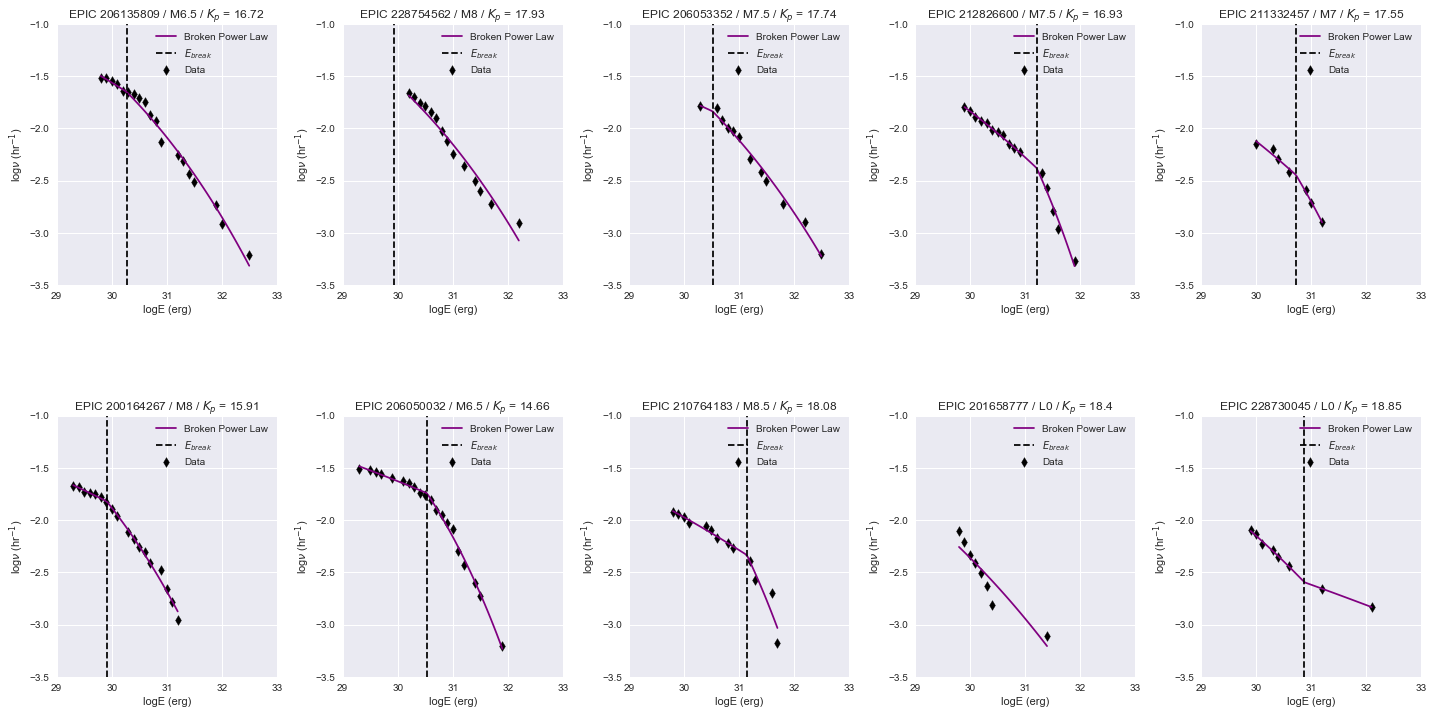

In [162]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
for i, epic in enumerate(set(data['EPIC']),start=0):
    
    tar = np.where(data['EPIC'] == epic)[0]
    tar_t = data['Ptime'][tar]
    tar_E = data['logE'][tar]
    
    c=Counter(tar_E)
    c = dict(c)
    
    energies = list(c.keys())
    freqs = list(c.values())
    cumul_freq = np.zeros((2,len(freqs)))

    for e in range(len(energies)):
        cumul_freq[0][e] = energies[e]
        count = 0
        for f in range(len(energies)):
        
            if (energies[e] == energies[f]) or (energies[e] < energies[f]):
                count += freqs[f]
            
            else:
                pass
        
            cumul_freq[1][e] = count
    
    tar_days = tar_t.max() - tar_t.min()

    tar_hours = tar_days * 24

    np.log10(1 / tar_hours)

    flr_engs = cumul_freq[0][:]
    
    logflrfreq = np.log10(cumul_freq[1][:] / tar_hours)
    
    axs[i].scatter(flr_engs[:-1],logflrfreq[:-1], c='k', marker = 'd', label='Data')
    
    def bpl(x, A, x_break, alpha_1, alpha_2):
        return powerlaws.BrokenPowerLaw1D.evaluate(x, A, x_break, alpha_1, alpha_2)

    popt, pcov = curve_fit(bpl, flr_engs[:-1], logflrfreq[:-1], p0 = (-2,30,-2,-5))

    dom = np.linspace(flr_engs[:-1].min(), flr_engs[:-1].max())
    axs[i].plot(dom, bpl(dom,*popt), ls='-', c='purple', label='Broken Power Law')
    axs[i].axvline(x=popt[1], c='k', ls='--', label=r'$E_{break}$')
    
    
#for ax in axs:
#    ax.label_outer()

j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel(r'log$\nu$ (hr$^{-1}$)')
    ax.set_ylim(-3.5,-1)
    ax.set_xlim(29,33)
    ax.legend()
    epic = list(set(data['EPIC']))
    
    for p in range(len(epic1)):
        if (epic1[p] == epic[j]):
            kep_mag = kp[p]
        else:
            pass
    
    ax.set_title(r'EPIC '+str(epic[j])+' / '+str(spec_list[j])+' / $K_p$ = '+str(kep_mag))
    j += 1
    
plt.savefig('Figures/ffd_BPLfit.png')

### Reading in Lightcurves to get ED uncertainties

In [40]:
fits_file = "https://archive.stsci.edu/missions/k2/lightcurves/c3/206100000/35000/ktwo206135809-c03_llc.fits"

In [41]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

In [42]:
with fits.open(fits_file, mode="readonly") as hdulist:
    k2_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    sap_errors = hdulist[1].data['SAP_FLUX_ERR']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_fluxes_err = hdulist[1].data['PDCSAP_FLUX_ERR']


<Container object of 3 artists>

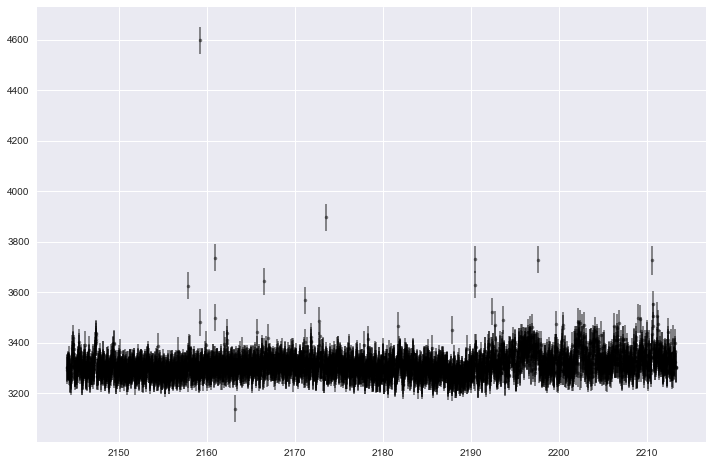

In [64]:
### Start figure and axis.
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
#ax.plot(k2_bjds, pdcsap_fluxes, 'ko')
ax.errorbar(k2_bjds, pdcsap_fluxes, 
             yerr=pdcsap_fluxes_err*10, fmt='.', color='k', alpha=0.5)

In [55]:
star1 = np.where(table3['EPIC'] == 206135809)[0]
flr_times1 = list(table3['Ptime'][star1])

(2159, 2159.5)

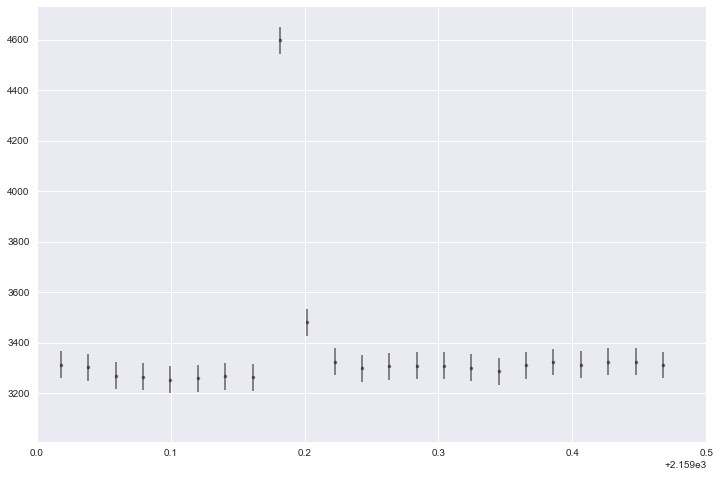

In [85]:
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
#ax.plot(k2_bjds, pdcsap_fluxes, 'ko')
ax.errorbar(k2_bjds, pdcsap_fluxes, 
             yerr=pdcsap_fluxes_err*10, fmt='.', color='k', alpha=0.5)
ax.set_xlim(2159 , 2159.5)

In [83]:
fluxnans = np.where(np.isnan(pdcsap_fluxes) == False)[0]
fluxerrnans = np.where(np.isnan(pdcsap_fluxes_err) == False)[0]
print(np.mean(pdcsap_fluxes_err[fluxerrnans][star1]))
print(np.std(pdcsap_fluxes_err[fluxerrnans][star1]))

5.2751064
0.038774244


In [ ]:
ED = np.trapz( (Ff-Fc) / Fc)